Link to the github repository: <</https://github.com/HENERALPEPITO/CMSC-197.git>>

**Add necessary Imports**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


**Load Advertising.csv dataset using pandas**

In [3]:
df = pd.read_csv("data/Advertising.csv")

**Standardize each column of the dataset**
**and compute for the standardized values:**

**add an extra column composing of all ones to X**

In [4]:
columns_to_standardize = ['TV', 'Radio', 'Newspaper', 'Sales']

# Standardize the selected columns
df[columns_to_standardize] = (df[columns_to_standardize] - df[columns_to_standardize].mean()) / df[columns_to_standardize].std()

df.insert(0, 'bias', 1)
#standardized DataFrame
df

,bias,Observation,TV,Radio,Newspaper,Sales
0,1,1,0.967425,0.979066,1.774493,1.548168
1,1,2,-1.194379,1.080097,0.667903,-0.694304
2,1,3,-1.512360,1.524637,1.779084,-0.905135
3,1,4,0.051919,1.214806,1.283185,0.858177
4,1,5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...,...
195,1,196,-1.267759,-1.317724,-0.769287,-1.230964
196,1,197,-0.615491,-1.236899,-1.031011,-0.828469
197,1,198,0.348934,-0.940539,-1.109069,-0.234310
198,1,199,1.590574,1.261955,1.636743,2.199827


**Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/Advertising.csv")
# Separate features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']] #regressors
y = df['Sales']  # dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)  
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (170, 3) (170,)
Testing set shape: (30, 3) (30,)


**Fitting the model on the training set. Ooptimize the model using training set, and not including the test set.**
**Predicting the quantitative response y on the train set. Evaluate performance we use the MSE cost function defined for the gradient descent.**
**Predict the quantitative response y on the test set. Evaluate performance. Using MSE cost function defined for the gradient descent.**

Iteration 0: Cost = 0.3924775343941345
Iteration 100: Cost = 0.05107973124743676
Iteration 200: Cost = 0.05107955473093679
Iteration 300: Cost = 0.051079554729786925
Iteration 400: Cost = 0.05107955472978691
Iteration 500: Cost = 0.05107955472978691
Iteration 600: Cost = 0.051079554729786925
Iteration 700: Cost = 0.051079554729786904
Iteration 800: Cost = 0.051079554729786904
Iteration 900: Cost = 0.051079554729786904
Iteration 1000: Cost = 0.051079554729786904
Iteration 1100: Cost = 0.05107955472978691
Iteration 1200: Cost = 0.051079554729786904
Iteration 1300: Cost = 0.051079554729786904
Iteration 1400: Cost = 0.051079554729786904
Iteration 1500: Cost = 0.051079554729786904
Iteration 1600: Cost = 0.051079554729786904
Iteration 1700: Cost = 0.051079554729786904
Iteration 1800: Cost = 0.051079554729786904
Iteration 1900: Cost = 0.051079554729786904
Iteration 2000: Cost = 0.051079554729786904
Iteration 2100: Cost = 0.051079554729786904
Iteration 2200: Cost = 0.051079554729786904
Iterati

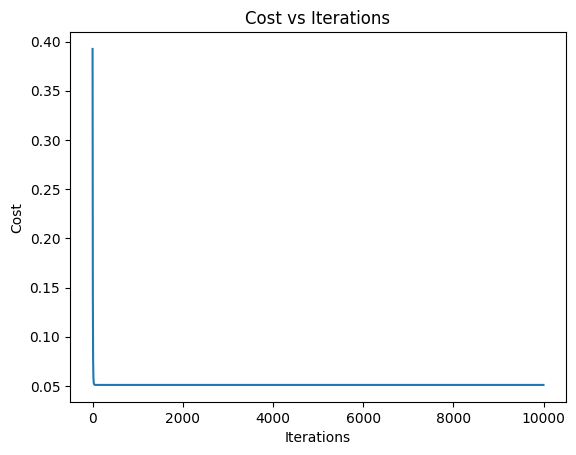

Training MSE: 0.10215910945957381
Test MSE: 0.10484566169031667
weight final: [[4.35589486e-04]
 [7.37383146e-01]
 [5.36307180e-01]
 [3.14254020e-03]]
Training R^2: 0.8936793584593188
Test R^2: 0.9110275702091712
Final Cost after 10000 iterations: 0.051079554729786904


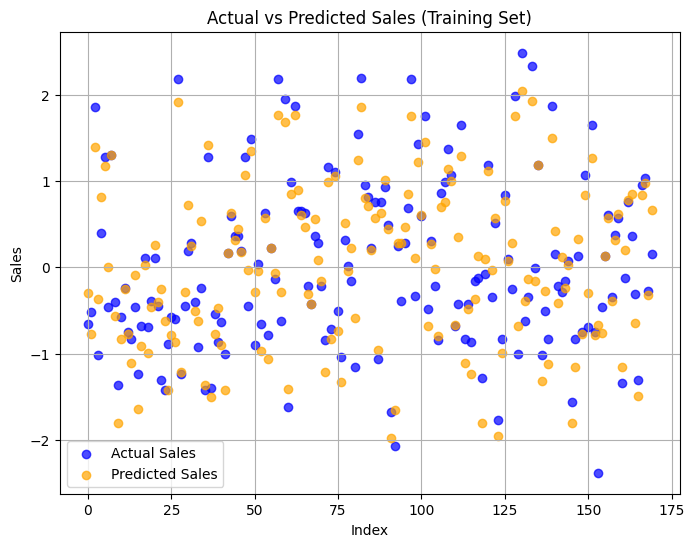

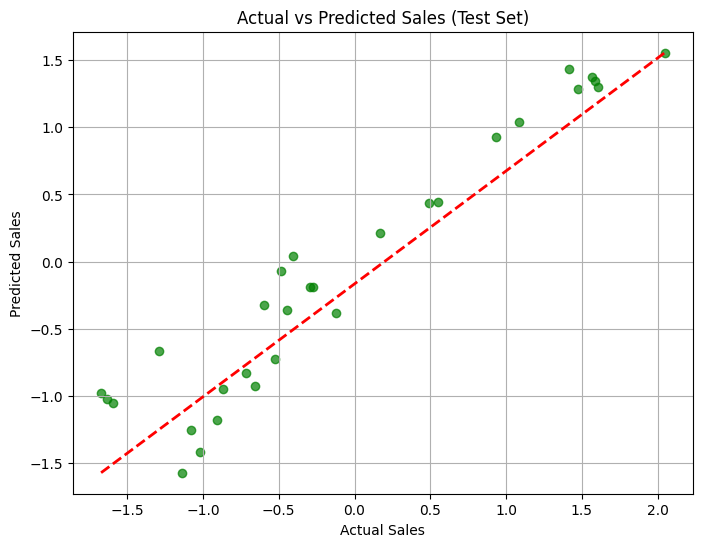

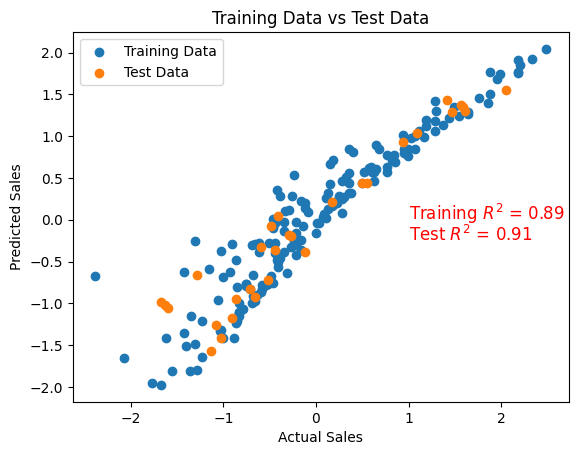

In [6]:
# Columns to standardize
columns_to_standardize = ['TV', 'Radio', 'Newspaper', 'Sales']

# Standardize the selected columns
df[columns_to_standardize] = (df[columns_to_standardize] - df[columns_to_standardize].mean()) / df[columns_to_standardize].std()

# Separate features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Regressors
y = df['Sales']  # Dependent variable

# Add a column of ones to the feature matrix for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding bias term (intercept)

# Split the data into training and testing sets
X_train_b, X_test_b, y_train, y_test = train_test_split(X_b, y, test_size=0.15, random_state=42)

# Initialize weights to zero
def initialize_weights():
    return np.zeros((X_train_b.shape[1], 1))  # Match the number of features (including bias)

# Prediction function
def predict(X, w):
    return X.dot(w)

# Compute cost (Mean Squared Error)
def compute_cost(X, y, w):
    m = len(y)
    predictions = predict(X, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
    return cost

# Compute gradient
def compute_gradient(X, y, w):
    m = len(y)
    predictions = predict(X, w)
    gradients = (1 / m) * X.T.dot(predictions - y.reshape(-1, 1))
    return gradients

# Update weights using gradient descent
def update_weights(w, gradients, learning_rate):
    return w - learning_rate * gradients

# Gradient descent function
def grad_descent(X, y, w, learning_rate=0.01, iterations=1000):
    costs = []
    for i in range(iterations):
        gradients = compute_gradient(X, y, w)
        w = update_weights(w, gradients, learning_rate)
        cost = compute_cost(X, y, w)
        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    return w, costs

# Plot cost over iterations
def plot_costs(costs):
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost vs Iterations")
    plt.show()

# Initialize weights
w_init = initialize_weights()

# Train the model using gradient descent
learning_rate = 0.1
iterations = 10000
w_final, costs = grad_descent(X_train_b, y_train.values, w_init, learning_rate, iterations)

# Plot the cost over iterations
plot_costs(costs)

# Predict for train and test sets
y_train_pred = predict(X_train_b, w_final)
y_test_pred = predict(X_test_b, w_final)

# Calculate MSE for both train and test sets
train_mse = np.mean((y_train_pred - y_train.values.reshape(-1, 1)) ** 2)
test_mse = np.mean((y_test_pred - y_test.values.reshape(-1, 1)) ** 2)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"weight final: {w_final}")

print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

final_cost = costs[-1]
print(f"Final Cost after {iterations} iterations: {final_cost}")


# Plot predictions for the training set
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_train)), y_train, color='blue', alpha=0.7, label='Actual Sales')
plt.scatter(range(len(y_train)), y_train_pred, color='orange', alpha=0.7, label='Predicted Sales')
plt.title("Actual vs Predicted Sales (Training Set)")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

# Plot predictions for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red', linestyle='--', lw=2)  # Perfect fit line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Test Set)")
plt.grid()
plt.show()

# R^2 Visualization using scatter plot
plt.scatter(y_train, y_train_pred, label='Training Data')
plt.scatter(y_test, y_test_pred, label='Test Data')
plt.title("Training Data vs Test Data")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(loc="best")

train_r2 = r2_score(y_train, y_train_pred)
plt.text(1, 0, f"Training $R^2$ = {train_r2:.2f}", fontsize=12, color="red")
test_r2 = r2_score(y_test, y_test_pred)
plt.text(1, -0.25, f"Test $R^2$ = {test_r2:.2f}", fontsize=12, color="red")
plt.show()


**Since the data is standardized, you might be surprised that the predictions differ**
**from the original data. In order to revert back a standardized data into the original form,**
**we simply have to equate the previous equation:**
$$
x_{scaled} \times \text{standard deviation}(x_j) + \text{mean}(x_j) = x_j
$$


In [7]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("data/Advertising.csv")

# Define a function to revert standardization
def revert_standardization(column, mean, std):
    return column * std + mean

# Calculate means and stds for each column and store in a dictionary
stats = {col: (df[col].mean(), df[col].std()) for col in ['TV', 'Radio', 'Newspaper', 'Sales']}

# Create a new DataFrame with reverted standardization
df2 = pd.DataFrame({col: revert_standardization(df[col], mean, std) for col, (mean, std) in stats.items()})
df2


,TV,Radio,Newspaper,Sales
0,19902.102276,584.473387,1537.634562,129.328290
1,3967.556016,606.743601,1012.769800,68.284048
2,1623.735365,704.732541,1539.812424,62.544846
3,13153.959302,636.437219,1304.603319,110.545446
4,15669.488426,183.609539,1302.425457,81.327690
...,...,...,...,...
195,3426.674327,78.197194,331.098968,53.675170
196,8234.511561,96.013365,206.960829,64.631829
197,15343.242328,161.339325,169.937173,80.805944
198,24495.303919,646.829985,1472.298700,147.067642


**Predicting data based on the reverted standardization**

In [8]:
# Revert standardization for predicted sales
y_train_pred_original = revert_standardization(y_train_pred, *stats['Sales'])
y_test_pred_original = revert_standardization(y_test_pred, *stats['Sales'])

# Revert standardization for actual sales (just for safety)
y_train_original = revert_standardization(y_train.values, *stats['Sales'])
y_test_original = revert_standardization(y_test.values, *stats['Sales'])

# Calculate MSE for the original scale
train_mse_original = np.mean((y_train_pred_original - y_train_original.reshape(-1, 1)) ** 2)
test_mse_original = np.mean((y_test_pred_original - y_test_original.reshape(-1, 1)) ** 2)

# Output the original scale MSEs
print(f"Original Scale Training MSE: {train_mse_original}")
print(f"Original Scale Test MSE: {test_mse_original}")

# Final Cost
final_cost = costs[-1]
print(f"Final Cost after {iterations} iterations: {final_cost}")

Original Scale Training MSE: 2.780960261859515
Original Scale Test MSE: 2.85409319180212
Final Cost after 10000 iterations: 0.051079554729786904



The costs and mean squared error (MSE) for both the standardized and original datasets are quite similar, indicating that we can achieve comparable results even without normalizing the data.

Furthermore, the cost function shows a consistent decline as the number of iterations increases. By employing the gradient descent algorithm, we can optimize the model effectively, leading to lower costs and improved accuracy for the response variable

**The optimal weights in gradient descent in the linear model:**

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot TV + \theta_2 \cdot Radio + \theta_3 \cdot Newspaper
$$

In [9]:
# Extract the weights (including bias)
bias, tv, radio, newspaper = w_final.flatten()

print(f'Weights: \n{w_final}')
print(f'\nh_theta(x) = {bias} + {tv}*TV + {radio}*Radio + {newspaper}*Newspaper')

# Sample prediction
index = 4
sample = df.iloc[index]



Weights: 
[[4.35589486e-04]
 [7.37383146e-01]
 [5.36307180e-01]
 [3.14254020e-03]]

h_theta(x) = 0.00043558948563035435 + 0.7373831463875999*TV + 0.536307179848284*Radio + 0.003142540200816531*Newspaper


**scatter plot of the y hat sub i and y sub i for both the train and test set**

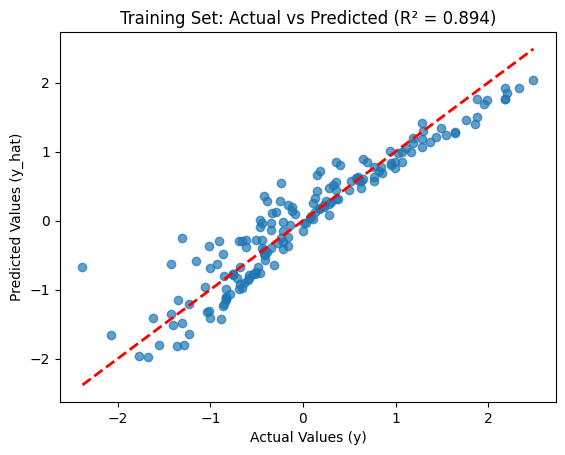

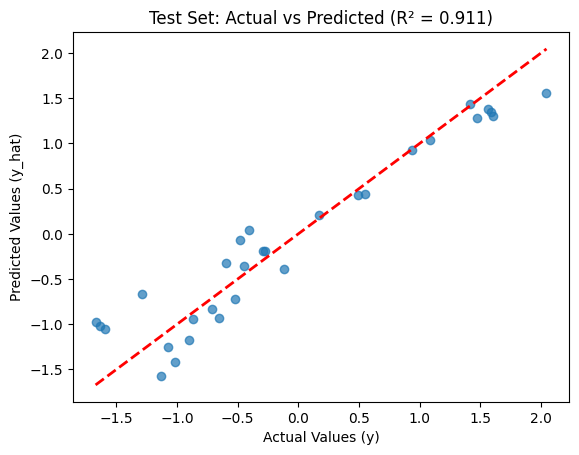

Training R² score: 0.8936793584593188
Test R² score: 0.9110275702091712


In [10]:
# Function to plot predicted vs actual values
def plot_pred_vs_actual(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Values (y)")
    plt.ylabel("Predicted Values (y_hat)")
    plt.title(title)
    plt.show()

# Plot for training set
plot_pred_vs_actual(y_train, y_train_pred, f"Training Set: Actual vs Predicted (R² = {train_r2:.3f})")

# Plot for test set
plot_pred_vs_actual(y_test, y_test_pred, f"Test Set: Actual vs Predicted (R² = {test_r2:.3f})")

# Print R² scores for clarity
print(f"Training R² score: {train_r2}")
print(f"Test R² score: {test_r2}")

What happens to the error, r2, and cost as the number of iterations increase? Show your
data and proof. You can alternatively plot your result data for visualization and check
until 50000 iterations or more (actually).

Iterations: 500 | Final Cost: 0.05107955472978691 | Train MSE: 0.10215910945957382 | Test MSE: 0.10484566169031827 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091699
Iterations: 1000 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169031666 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Iterations: 2500 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169031666 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Iterations: 5000 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169031667 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Iterations: 10000 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169031667 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Iterations: 50000 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169

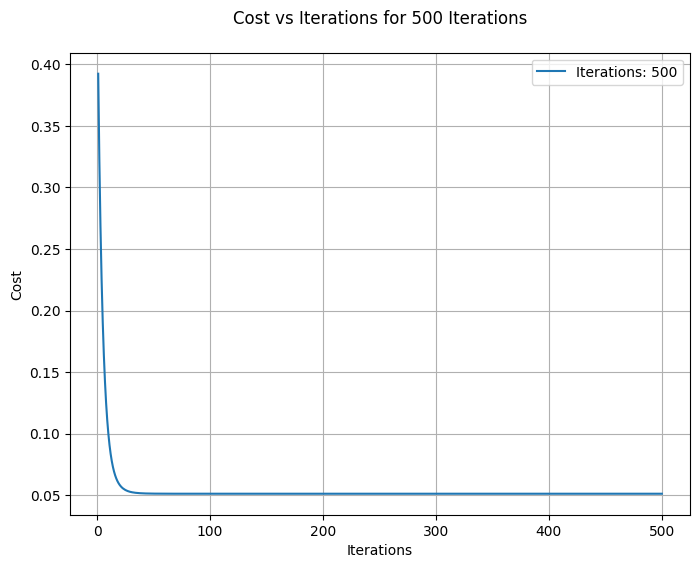

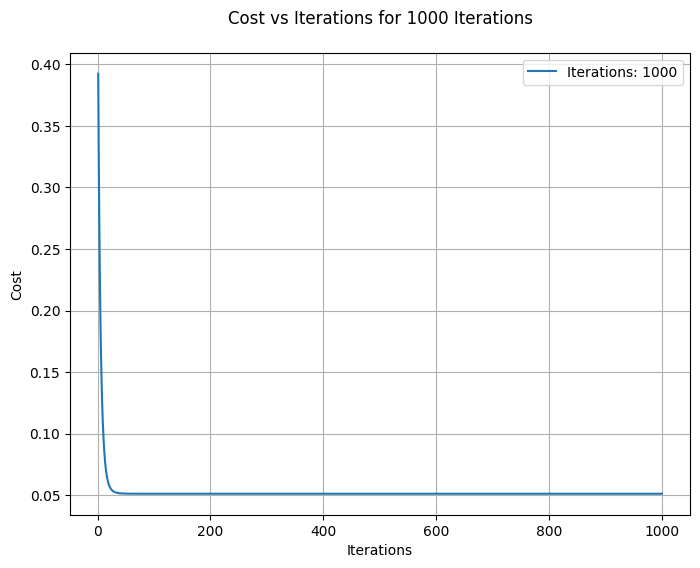

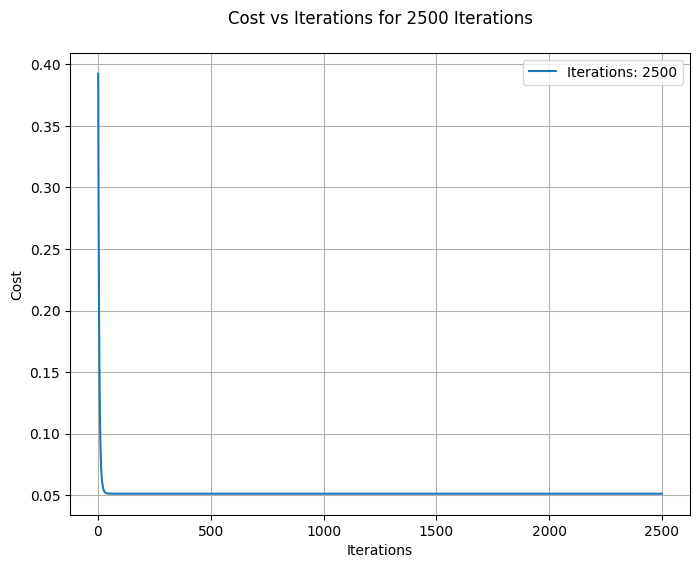

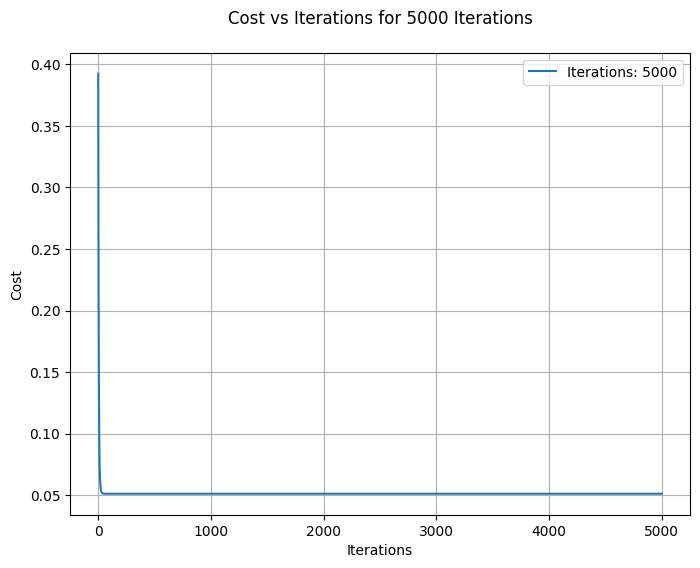

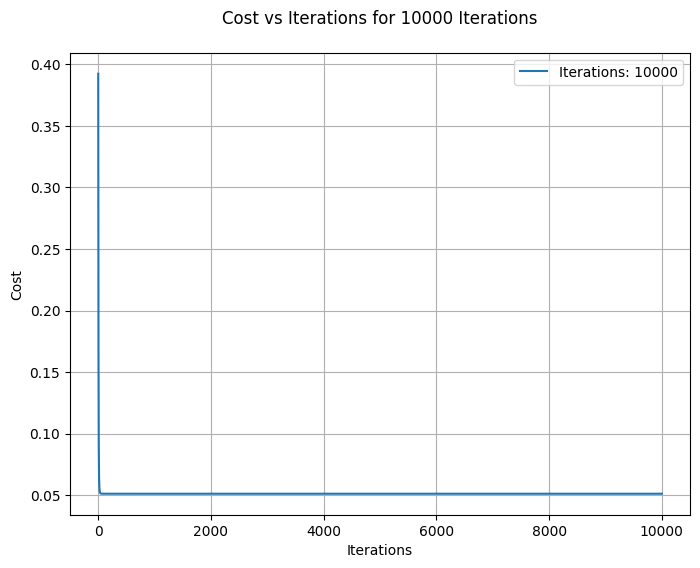

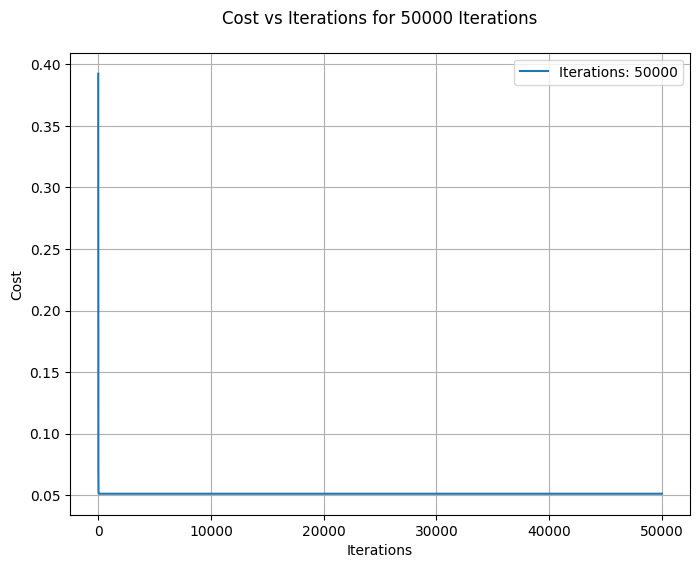

In [18]:
# Gradient descent function for multiple iterations
def grad_descent_multi_iterations(X_train, y_train, X_test, y_test, w_init, learning_rate, iterations_list):
    results = []
    for iterations in iterations_list:
        w = w_init.copy()
        costs = []
        for i in range(iterations):
            gradients = compute_gradient(X_train, y_train, w)
            w = update_weights(w, gradients, learning_rate)
            cost = compute_cost(X_train, y_train, w)
            costs.append(cost)
        
        # Predictions and metrics
        y_train_pred = predict(X_train, w)
        y_test_pred = predict(X_test, w)
        train_mse = np.mean((y_train_pred - y_train.reshape(-1, 1)) ** 2)
        test_mse = np.mean((y_test_pred - y_test.reshape(-1, 1)) ** 2)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        final_cost = costs[-1]
        
        results.append({
            'iterations': iterations,
            'costs': costs,
            'final_cost': final_cost,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2
        })
        print(f"Iterations: {iterations} | Final Cost: {final_cost} | Train MSE: {train_mse} | Test MSE: {test_mse} | Train R²: {train_r2} | Test R²: {test_r2}")
    return results

# Iteration values to test
iterations_list = [500, 1000, 2500, 5000, 10000, 50000]

# Initialize weights
w_init = initialize_weights()

# Learning rate
learning_rate = 0.1

# Train the model using gradient descent for different iteration values
results = grad_descent_multi_iterations(X_train_b, y_train.values, X_test_b, y_test.values, w_init, learning_rate, iterations_list)

# Create individual cost vs iteration plots for each setting
for result in results:
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(result['costs']) + 1), result['costs'], label=f"Iterations: {result['iterations']}")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Cost vs Iterations for {result['iterations']} Iterations\n")
    plt.legend()
    plt.grid(True)
    plt.show()

**Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning**
**include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in** **ONLY ONE PLOT. Provide your analysis.**

Learning Rate: 0.2 | Final Cost: 0.051079554729786925 | Train MSE: 0.10215910945957385 | Test MSE: 0.10484566169031671 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Learning Rate: 0.1 | Final Cost: 0.051079554729786904 | Train MSE: 0.10215910945957381 | Test MSE: 0.10484566169031667 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091712
Learning Rate: 0.01 | Final Cost: 0.05107955472978691 | Train MSE: 0.10215910945957382 | Test MSE: 0.10484566169031567 | Train R²: 0.8936793584593188 | Test R²: 0.9110275702091721
Learning Rate: 0.001 | Final Cost: 0.05107983632997439 | Train MSE: 0.10215967265994878 | Test MSE: 0.10489833816193528 | Train R²: 0.8936787723165314 | Test R²: 0.9109828687537448
Learning Rate: 0.0001 | Final Cost: 0.10522301025059122 | Train MSE: 0.21044602050118244 | Test MSE: 0.27942373552842653 | Train R²: 0.7809812944951018 | Test R²: 0.7628799485797881


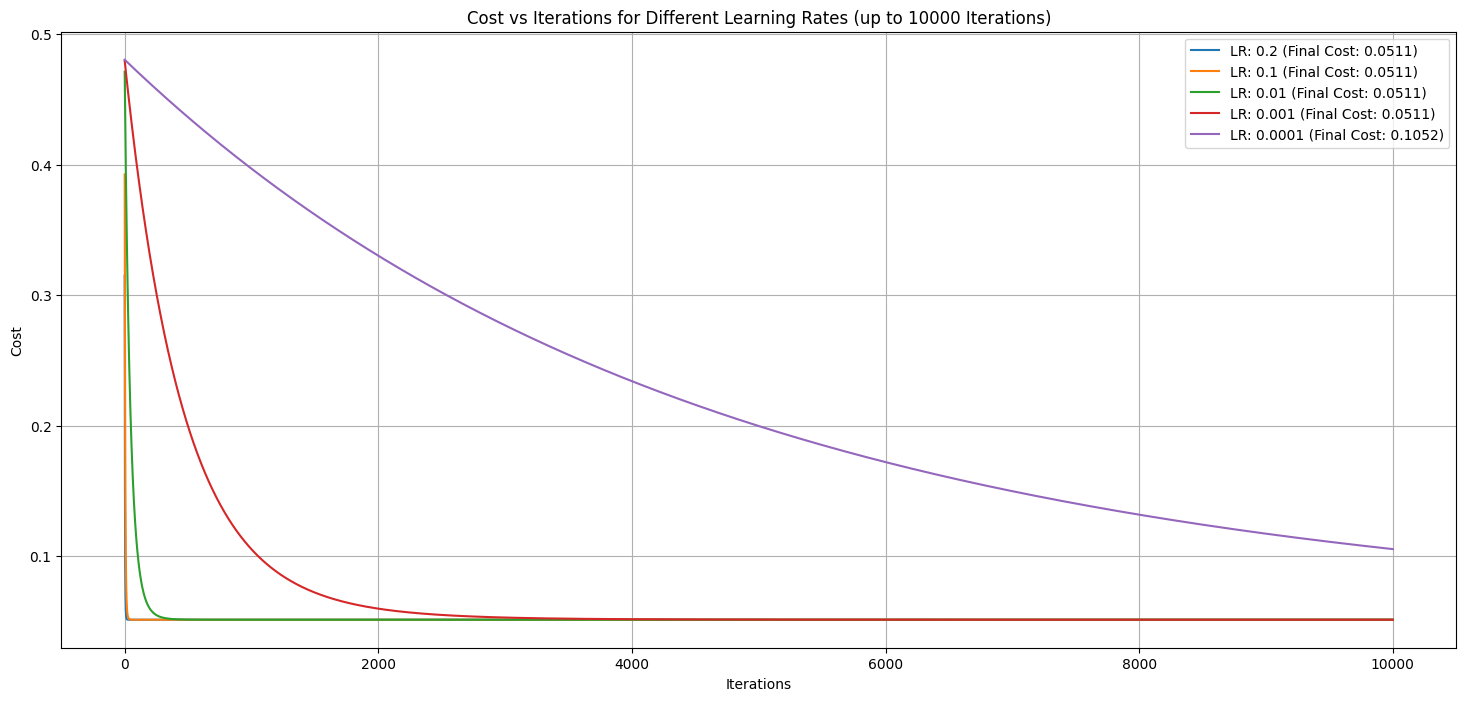

In [17]:
# Gradient descent function with learning rate analysis
def grad_descent_with_lr_analysis(X_train, y_train, X_test, y_test, w_init, learning_rates, iterations):
    results = []
    for lr in learning_rates:
        w = w_init.copy()
        costs = []
        for i in range(iterations):
            gradients = compute_gradient(X_train, y_train, w)
            w = update_weights(w, gradients, lr)
            cost = compute_cost(X_train, y_train, w)
            costs.append(cost)
        
        # Predictions and metrics
        y_train_pred = predict(X_train, w)
        y_test_pred = predict(X_test, w)
        train_mse = np.mean((y_train_pred - y_train.reshape(-1, 1)) ** 2)
        test_mse = np.mean((y_test_pred - y_test.reshape(-1, 1)) ** 2)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        final_cost = costs[-1]
        
        results.append({
            'learning_rate': lr,
            'costs': costs,
            'final_cost': final_cost,
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2
        })
        print(f"Learning Rate: {lr} | Final Cost: {final_cost} | Train MSE: {train_mse} | Test MSE: {test_mse} | Train R²: {train_r2} | Test R²: {test_r2}")
    return results

# Learning rates to test
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001]

# Optimal number of iterations determined previously
optimal_iterations = 10000  # Replace this with the optimal value found previously

# Initialize weights
w_init = initialize_weights()

# Train the model using gradient descent for different learning rates
results_lr = grad_descent_with_lr_analysis(X_train_b, y_train.values, X_test_b, y_test.values, w_init, learning_rates, optimal_iterations)
# Plot the cost over iterations for each learning rate
plt.figure(figsize=(18, 8))
for result in results_lr:
    plt.plot(range(1, len(result['costs']) + 1), result['costs'], label=f"LR: {result['learning_rate']} (Final Cost: {result['final_cost']:.4f})")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title(f"Cost vs Iterations for Different Learning Rates (up to {optimal_iterations} Iterations)")
plt.legend()
plt.grid(True)
plt.show()


When the learning rate is excessively low, such as 0.0001 or 0.001, the cost of the gradient descent model remains high (after 400 iterations). Meanwhile, when the learning rate is too high, such as 0.2 or 0.1, the cost function returns too steeply and is not acceptable for the number of iterations provided since it takes too great a step with each iteration. If the learning rate is just appropriate, such as 0.01 for this dataset, the costs vary gradually with each iteration, and you can see how the cost decreases as it iterates, eventually reaching a significant minimum.

**Is there a relationship on the learning rate and the number of iterations?**


If the learning rate is too small, the model will require significantly more iterations to reduce the cost, consuming excessive time and resources. On the other hand, if the learning rate is too large and the number of iterations is low, gradient descent may take overly large steps, potentially overshooting or missing the optimal minimum cost altogether.

To address this, when we increase the number of iterations significantly, it's crucial to decrease the learning rate proportionally. This ensures that the model's weights adjust more gradually with each iteration, allowing it to converge effectively towards the minimum cost.

**Compare the results with the results of ordinary least squares function.**

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the OLS model
ols_model = LinearRegression()
ols_model.fit(X_train_b, y_train)

# Get predictions for both training and testing sets
ols_predictions_train = ols_model.predict(X_train_b)
ols_predictions_test = ols_model.predict(X_test_b)

# Calculate R² scores for OLS
ols_r2_train = r2_score(y_train, ols_predictions_train)
ols_r2_test = r2_score(y_test, ols_predictions_test)

# Get the OLS weights (including intercept as bias term)
ols_weights = np.insert(ols_model.coef_, 0, ols_model.intercept_)

# Print the results
print("----- Comparison of Gradient Descent and OLS -----\n")

# Weights Comparison
print("Weights (Gradient Descent):")
print(w_final)  
print("Weights (OLS):")
print(ols_weights)

# R² Score Comparison
print("\nR² Score Comparison:")
print(f"Gradient Descent R² (Train): {train_r2}")  
print(f"Gradient Descent R² (Test):  {test_r2}")   
print(f"OLS R² (Train):              {ols_r2_train}")
print(f"OLS R² (Test):               {ols_r2_test}")

# Optional: Print MSE or other relevant metrics for more insights (if needed)
train_mse_gd = np.mean((y_train_pred - y_train.values.reshape(-1, 1)) ** 2)  
test_mse_gd = np.mean((y_test_pred - y_test.values.reshape(-1, 1)) ** 2)  
train_mse_ols = np.mean((ols_predictions_train - y_train) ** 2)
test_mse_ols = np.mean((ols_predictions_test - y_test) ** 2)

# MSE Comparison
print("\nMSE Comparison:")
print(f"Gradient Descent MSE (Train): {train_mse_gd}")
print(f"Gradient Descent MSE (Test):  {test_mse_gd}")
print(f"OLS MSE (Train):              {train_mse_ols}")
print(f"OLS MSE (Test):               {test_mse_ols}")


----- Comparison of Gradient Descent and OLS -----

Weights (Gradient Descent):
[[4.35589486e-04]
 [7.37383146e-01]
 [5.36307180e-01]
 [3.14254020e-03]]
Weights (OLS):
[4.35589486e-04 0.00000000e+00 7.37383146e-01 5.36307180e-01
 3.14254020e-03]

R² Score Comparison:
Gradient Descent R² (Train): 0.8936793584593188
Gradient Descent R² (Test):  0.9110275702091712
OLS R² (Train):              0.8936793584593188
OLS R² (Test):               0.9110275702091715

MSE Comparison:
Gradient Descent MSE (Train): 0.10215910945957381
Gradient Descent MSE (Test):  0.10484566169031667
OLS MSE (Train):              0.10215910945957381
OLS MSE (Test):               0.10484566169031649


The outcomes from both OLS and Gradient Descent are largely comparable, with OLS showing slightly superior performance. This suggests that my implementation of Gradient Descent is effective, as it produced results closely aligned with those from scikit-learn's OLS. The consistency of these findings implies that both methods have successfully converged to the same minimum, potentially the global minimum, in their predictions for the dataset.
